In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
rc('legend', fontsize=12)
matplotlib.rcParams['savefig.dpi'] = 1200


from utils_import_data import import_MS_FLU_pos_data


Example 1 of cumulative effects

In [2]:
Y = import_MS_FLU_pos_data()
months = 7; years = 8; pad = 6; pad_front = 2; ratio = 0.995
Y_avg = np.zeros((months+pad,))
for i in range(years):
    Y_avg[pad_front:(months+pad_front)] = Y_avg[pad_front:(months+pad_front)] + np.mean(Y[:,(i*months):((i+1)*months)], axis=0)/years
Y_avg[months] = np.mean(Y_avg[months:(months+pad_front-1)])
for j in range(months,months+pad):
    Y_avg[j] = Y_avg[months] * (ratio ** (j + 1 - months))
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'full')

In [3]:
val = movingaverage(Y_avg, 6)
val[8] = ((val[9] + val[7])/2 - val[8]) * 5 + val[8]

In [4]:
pre_T = 7
tau0 = -np.mean(val)/12; tau1 = tau0 * 2; tau2 = tau0 * 2.4
taus = [0] * pre_T + [tau0, tau1] + [tau2] * (len(val) - pre_T - 2)
out = dict()
out['$\mathrm{treated}$'] = np.array(val) + np.array(taus)
out['$\mathrm{control}$'] = val
out_df = pd.DataFrame(out)
out_df = out_df.iloc[2:14,:] * 1000
out_df.reset_index(drop=True, inplace=True)
new_idx = pd.Series(out_df.index.values - 4)
out_df.set_index(new_idx, inplace=True)
out_df = out_df[['$\mathrm{control}$', '$\mathrm{treated}$']]

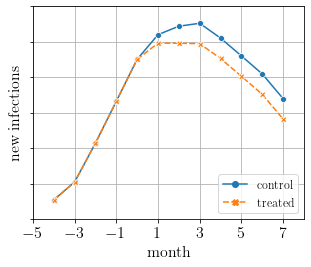

In [5]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(5,4))
sns.lineplot(data=out_df, markers=True)
plt.xlabel('$\mathrm{month}$')
plt.ylabel('$\mathrm{new~infections}$')
# plt.title('$\mathrm{Accumulative}\,\,\mathrm{Effect}$')
plt.tight_layout()
plt.ylim([0., 3])
plt.xlim([out_df.index.min()-1,out_df.index.max()+1])
major_ticks = np.arange(out_df.index.min()-1,out_df.index.max()+1, 2)
minor_ticks = np.arange(out_df.index.min()-1,out_df.index.max()+1, 2)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.axes.yaxis.set_ticklabels([])

plt.grid()
plt.legend(loc='lower right')

plt.savefig('../figures/cumulative_effect_new_infection.pdf')

Example 2 of cumulative effects

In [6]:
scale = 1.65
base = 350+0.3/2.3*50
vals = list(base+7.5*np.array([0,0,0, 0, 0, 3*scale+0.55, 5*scale+0.7, 5*scale, 4*scale+0.7, 3*scale+1.55, 3*scale+1.05])/scale)

In [7]:
pre_T = 6; post_T = 14
out = dict()
out['$\mathrm{treated}$'] = [base] * pre_T + vals + [vals[-1]] * post_T 
out['$\mathrm{control}$'] = [base] * (pre_T + len(vals) + post_T)
out_df = pd.DataFrame(out)
out_df = out_df.iloc[8:20,:]/100
out_df.reset_index(drop=True, inplace=True)
new_idx = pd.Series(out_df.index.values - 2)
out_df.set_index(new_idx, inplace=True)
out_df = out_df[['$\mathrm{control}$', '$\mathrm{treated}$']]

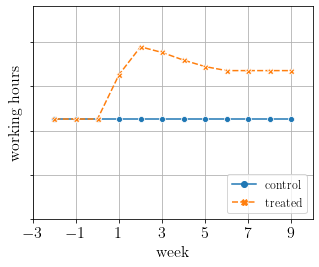

In [8]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(5,4))
sns.lineplot(data=out_df, markers=True)
plt.xlabel('$\mathrm{week}$')
plt.ylabel('$\mathrm{working~hours}$')
plt.tight_layout()
plt.ylim([3, 4.2])
plt.xlim([out_df.index.min()-1,out_df.index.max()+1])
major_ticks = np.arange(out_df.index.min()-1,out_df.index.max()+1, 2)
minor_ticks = np.arange(out_df.index.min()-1,out_df.index.max()+1, 2)


ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.axes.yaxis.set_ticklabels([])

plt.grid()
plt.legend(loc='lower right')
plt.savefig('../figures/wearout_effect_app.pdf')